# 1. Квадратичное программирование и QP солвер

Импортируем необходимые для задания библиотеки

In [18]:
from cvxopt import matrix, solvers

Решаем задачу оптимизации для двумерного пространства:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$

Для этого определим матрицы, необходимые для нахождения точки минимума:

In [19]:
P = matrix([[2.0, 0.0],
            [0.0, 8.0]])  # 2*x1^2 и 2*4*x2^2

q = matrix([-8.0, -16.0])  # -8*x1 и -16*x2


G = matrix([[1.0, -1.0, 1.0, 0.0],  # левая часть ограничений
            [1.0, 0.0, 0.0, -1.0]])
h = matrix([5.0, 0.0, 3.0, 0.0])  # правая часть ограничений


In [20]:

# Решаем задачу
solution = solvers.qp(P, q, G, h)

# Выводим результаты
x = solution['x']
print("Оптимальное значение x1:", x[0])
print("Оптимальное значение x2:", x[1])
print("Минимальное значение функции:", solution['primal objective'])


     pcost       dcost       gap    pres   dres
 0: -3.0512e+01 -3.8829e+01  8e+00  0e+00  2e-01
 1: -3.0792e+01 -3.1146e+01  4e-01  2e-16  5e-03
 2: -3.0982e+01 -3.1024e+01  4e-02  1e-16  4e-04
 3: -3.0997e+01 -3.1003e+01  6e-03  2e-16  5e-17
 4: -3.1000e+01 -3.1000e+01  7e-04  2e-16  3e-17
 5: -3.1000e+01 -3.1000e+01  1e-04  2e-16  4e-17
 6: -3.1000e+01 -3.1000e+01  1e-05  2e-16  3e-17
Optimal solution found.
Оптимальное значение x1: 2.9999998301061535
Оптимальное значение x2: 1.9986909284531613
Минимальное значение функции: -30.99999280553902


**Визуальное решение**

In [21]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\1\AppData\Local\Temp\ipykernel_6464\1475976510.py:16: UserWarning: linewidths is ignored by contourf
  plt.contourf(x1, x2, constr1 & constr2 & constr3, 1, alpha=0.5, linewidths=4, cmap='gray')


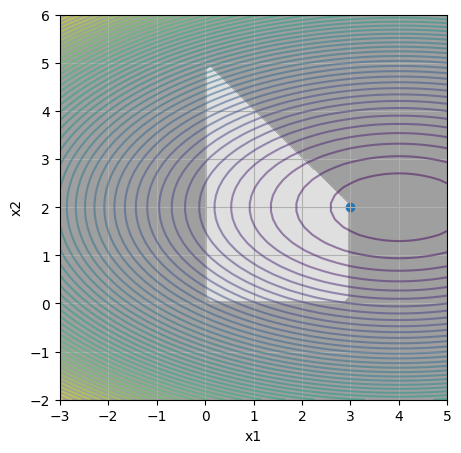

In [22]:
x1 = np.linspace(-3, 5, 50)
x2 = np.linspace(-2, 6, 50)
xx1, xx2 = np.meshgrid(x1, x2)

f = -8*xx1 - 16*xx2 + xx1**2 + 4*xx2**2
constr1 = (xx1 + xx2 <= 5)
constr2 = (0 <= xx1) & (xx1 <= 3)
constr3 = (xx2 >= 0)

plt.figure(figsize=(5, 5))
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')

plt.contour(x1, x2, f, 50, alpha=0.5)
plt.contourf(x1, x2, constr1 & constr2 & constr3, 1, alpha=0.5, linewidths=4, cmap='gray')
_ = plt.scatter([3], [2])

**3 пункт**

Думаю, что ответ на данный вопрос можно предоставить словесно. Мы уже решили задачу и нашли точки оптимума. Если посмотреть на получившиеся ответы, то видим, что х1 довольно близок к одной из границ. Этот факт позволяет сделать вывод, что ограничение x1<=3 является активным, а остальные в принципе не влияют на нахождение оптимальных значений и могут быть опущены.

# 2. Линейный SVM

# 1 пункт

In [23]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn import svm

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=2)
y = y * 2 - 1


In [24]:
def solve_svm_qp(X, y, C):
    m, n = X.shape
    K = np.dot(X, X.T)
    
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(-np.ones(m))
    G = cvxopt.matrix(np.vstack((-np.eye(m), np.eye(m))))
    h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
    A = cvxopt.matrix(y.astype(float), (1, m))
    b = cvxopt.matrix(0.0)

    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    alphas = np.ravel(solution['x'])
    return alphas

def get_weights_and_bias(X, y, alphas):
    w = np.sum(alphas[:, None] * y[:, None] * X, axis=0)
    sv = (alphas > 1e-5)
    b = np.mean(y[sv] - np.dot(X[sv], w))
    return w, b



     pcost       dcost       gap    pres   dres
 0: -2.1994e+01 -2.4882e+02  1e+03  3e+00  3e-15
 1: -1.2145e+01 -1.5603e+02  3e+02  4e-01  2e-15
 2: -5.8794e+00 -3.2700e+01  3e+01  2e-02  4e-15
 3: -8.1075e+00 -1.6622e+01  9e+00  6e-03  2e-15
 4: -9.4421e+00 -1.3176e+01  4e+00  2e-03  1e-15
 5: -1.0147e+01 -1.1479e+01  1e+00  7e-04  1e-15
 6: -1.0587e+01 -1.0875e+01  3e-01  6e-06  1e-15
 7: -1.0684e+01 -1.0716e+01  3e-02  5e-07  1e-15
 8: -1.0695e+01 -1.0701e+01  6e-03  6e-08  1e-15
 9: -1.0698e+01 -1.0698e+01  6e-05  6e-10  1e-15
10: -1.0698e+01 -1.0698e+01  6e-07  6e-12  1e-15
Optimal solution found.


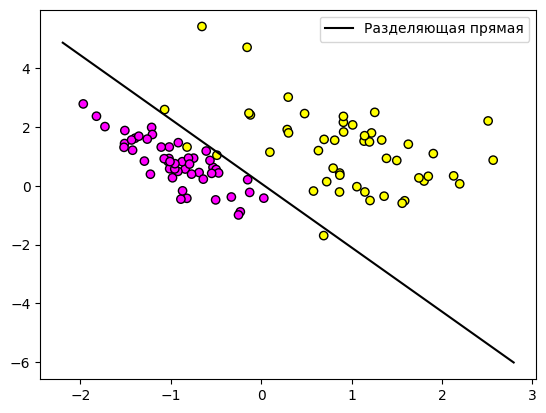

In [25]:
C = 1.0
alphas = solve_svm_qp(X, y, C)
w, b = get_weights_and_bias(X, y, alphas)

def plot_svm_qp(X, y, w, b):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='spring', edgecolors='k')
    xlim = plt.gca().get_xlim()
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = (-w[0] * xx - b) / w[1]
    plt.plot(xx, yy, 'k-', label="Разделяющая прямая")
    plt.legend()
    plt.show()

# Отображаем результат
plot_svm_qp(X, y, w, b)

# 2 пункт

In [26]:
def plot_svm_decision_boundary(X, y, kernel, C, subplot_position, title):
    plt.subplot(1, 3, subplot_position)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    model = SVC(kernel=kernel, C=C)
    model.fit(X_scaled, y)
    
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=50, cmap='spring', edgecolors='k')
    
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black', label='Support Vectors')
    
    # Отображение разделяющей линии
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    
    plt.title(title)
    plt.legend()



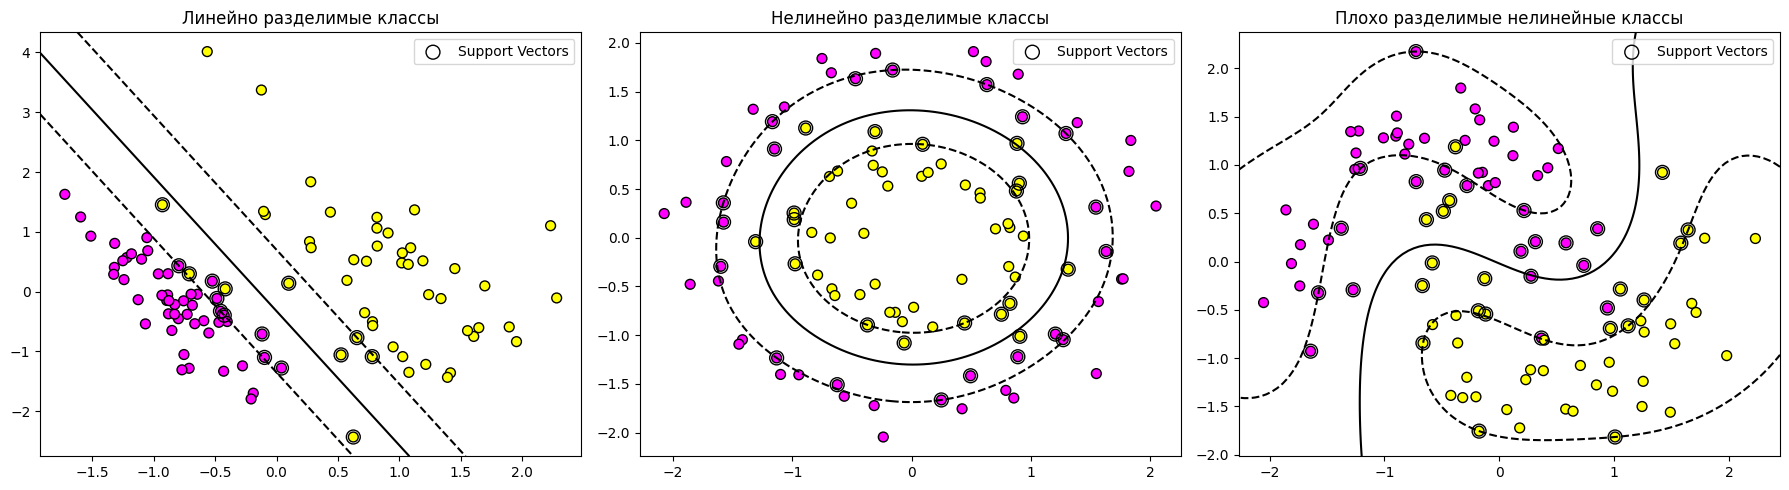

In [27]:
plt.figure(figsize=(18, 5))

# 1. Линейно разделимые классы
X1, y1 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=2)
plot_svm_decision_boundary(X1, y1, kernel='linear', C=1.0, subplot_position=1, title="Линейно разделимые классы")

# 2. Нелинейно разделимые классы (используем нелинейное ядро)
X2, y2 = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)
plot_svm_decision_boundary(X2, y2, kernel='rbf', C=1.0, subplot_position=2, title="Нелинейно разделимые классы")

# 3. Плохо разделимые нелинейные классы (используем make_moons)
X3, y3 = make_moons(n_samples=100, noise=0.2, random_state=42)
plot_svm_decision_boundary(X3, y3, kernel='rbf', C=1.0, subplot_position=3, title="Плохо разделимые нелинейные классы")

plt.tight_layout()
plt.show()

# 3 пункт

In [28]:
def plot_svm_decision_boundary(X, y, kernel, C, subplot_position, title):
    plt.subplot(1, len(C_values), subplot_position)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    model = SVC(kernel=kernel, C=C)
    model.fit(X_scaled, y)
    
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=50, cmap='spring', edgecolors='k', label='Data points')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black', label='Support Vectors')
    
    # Отображение разделяющей линии
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500), np.linspace(ylim[0], ylim[1], 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    
    plt.title(f'{title}\nC={C}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()


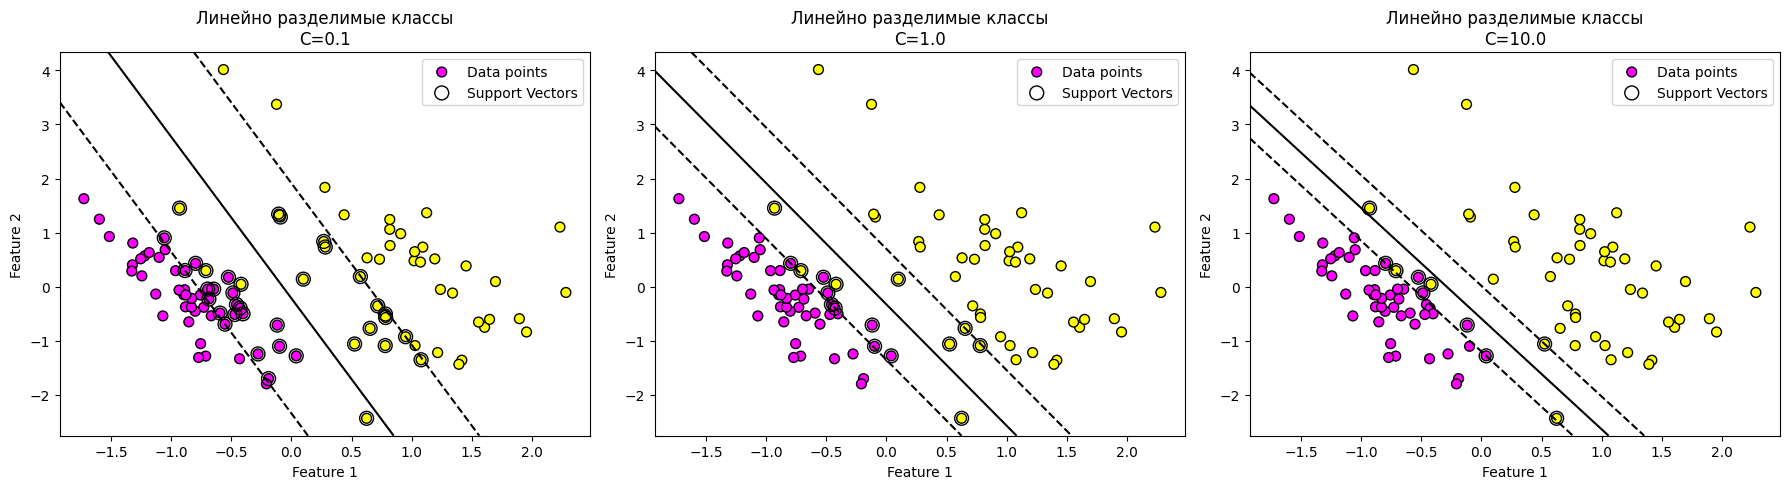

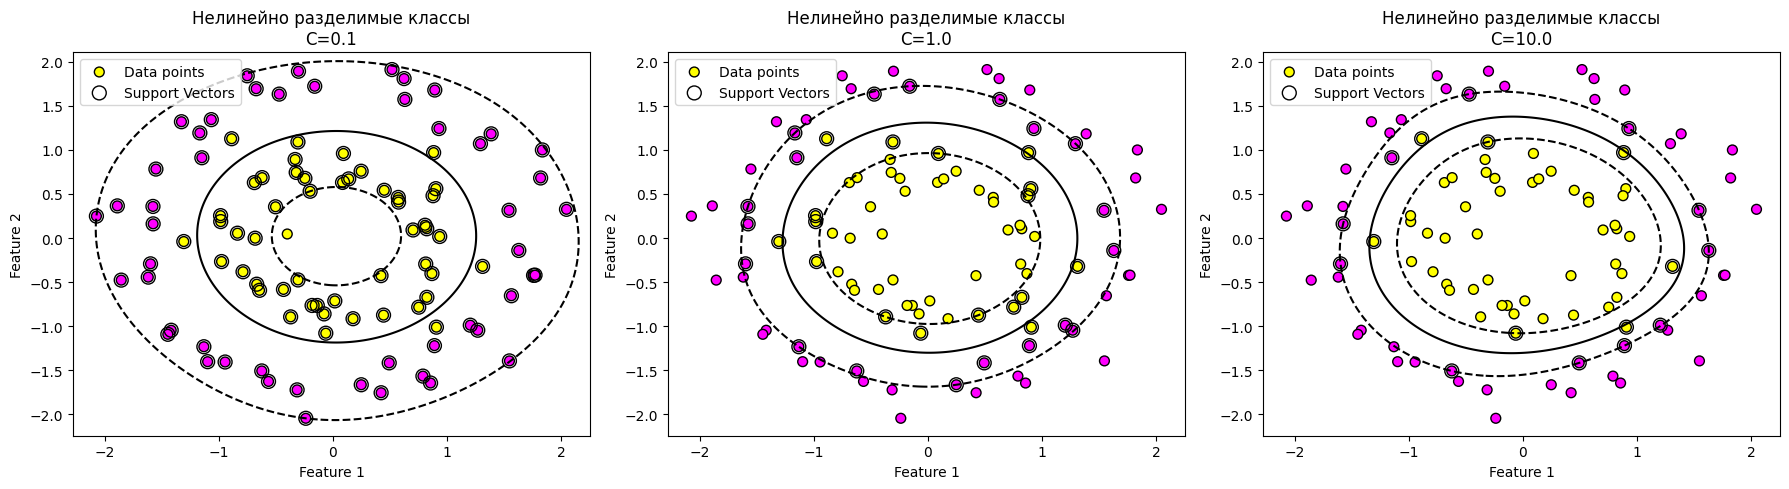

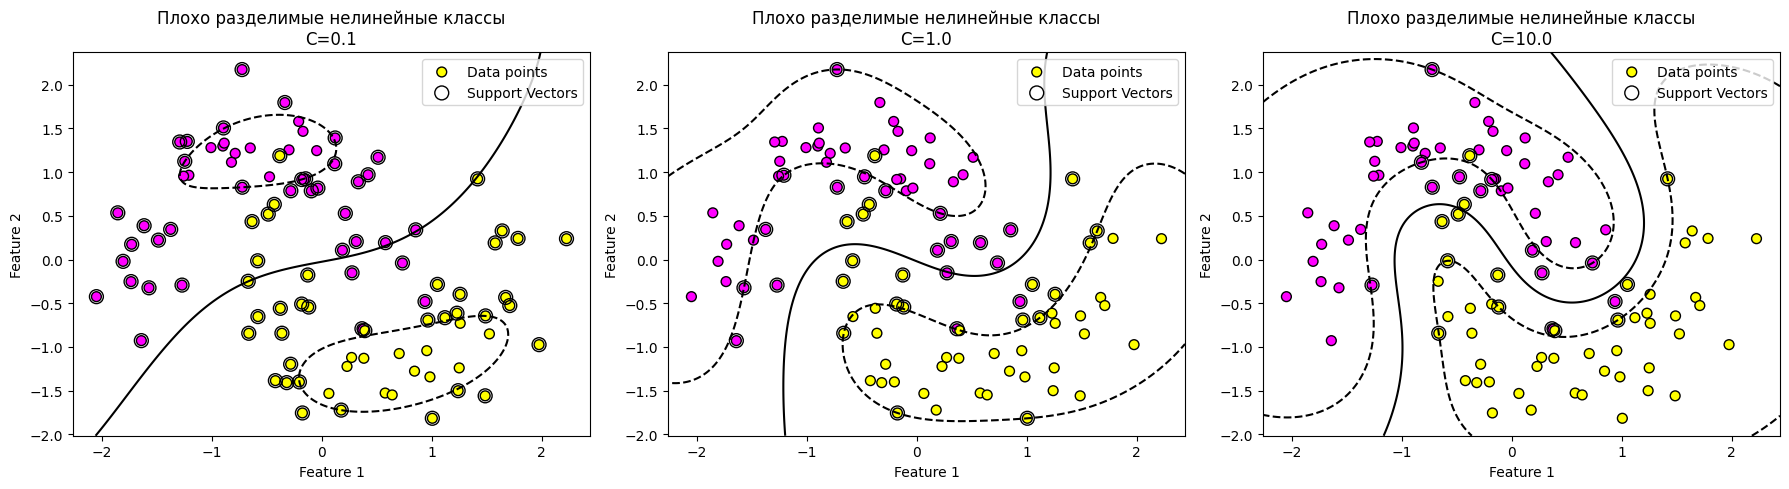

In [29]:
# Определение значений C
C_values = [0.1, 1.0, 10.0]

plt.figure(figsize=(18, 5))

# 1. Линейно разделимые классы
X1, y1 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=2)
for i, C in enumerate(C_values, 1):
    plot_svm_decision_boundary(X1, y1, kernel='linear', C=C, subplot_position=i, title="Линейно разделимые классы")

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 5))

# 2. Нелинейно разделимые классы (используем нелинейное ядро)
X2, y2 = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)
for i, C in enumerate(C_values, 1):
    plot_svm_decision_boundary(X2, y2, kernel='rbf', C=C, subplot_position=i, title="Нелинейно разделимые классы")

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 5))

# 3. Плохо разделимые нелинейные классы (используем make_moons)
X3, y3 = make_moons(n_samples=100, noise=0.2, random_state=42)
for i, C in enumerate(C_values, 1):
    plot_svm_decision_boundary(X3, y3, kernel='rbf', C=C, subplot_position=i, title="Плохо разделимые нелинейные классы")

plt.tight_layout()
plt.show()


# 4 пункт

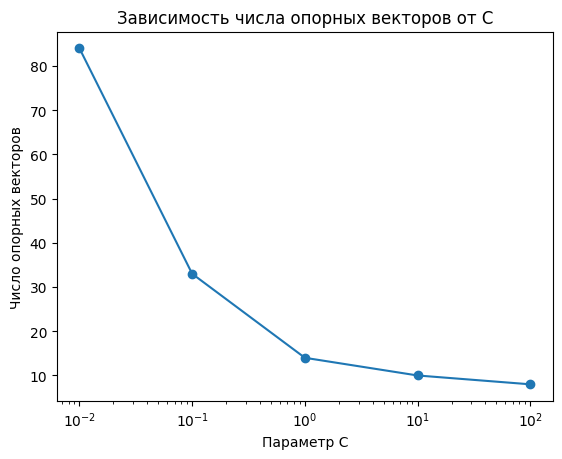

In [30]:
Cs = [0.01, 0.1, 1, 10, 100]
n_support_vectors = []

for C in Cs:
    clf = svm.SVC(C=C, kernel='linear')
    clf.fit(X1, y1)
    n_support_vectors.append(len(clf.support_vectors_))

plt.plot(Cs, n_support_vectors, marker='o')
plt.xscale('log')
plt.xlabel('Параметр C')
plt.ylabel('Число опорных векторов')
plt.title('Зависимость числа опорных векторов от C')
plt.show()


# 5 пункт

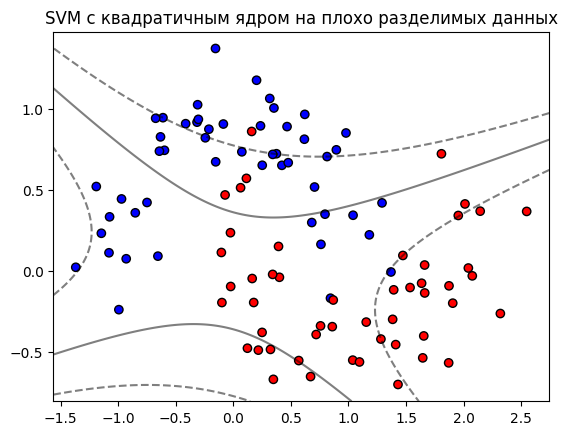

In [31]:
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=2)
clf_poly.fit(X3, y3)

def plot_poly_svm(X, y, model, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title(title)

plot_poly_svm(X3, y3, clf_poly, 'SVM с квадратичным ядром на плохо разделимых данных')
plt.show()


# 3 задание

## 1 пункт

In [32]:
import numpy as np
from cvxopt import matrix, solvers


In [33]:
def svm_train(X, y, C, kernel='linear', degree=3, gamma=1.0):
    n_samples, n_features = X.shape
    K = np.zeros((n_samples, n_samples))
    
    if kernel == 'linear':
        K = np.dot(X, X.T)
    elif kernel == 'poly':
        K = (np.dot(X, X.T) + 1) ** degree
    elif kernel == 'rbf':
        for i in range(n_samples):
            for j in range(n_samples):
                diff = X[i] - X[j]
                K[i, j] = np.exp(-gamma * np.dot(diff, diff))
    
    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))
    
    G = matrix(np.vstack([-np.eye(n_samples), np.eye(n_samples)]))
    h = matrix(np.hstack([np.zeros(n_samples), C * np.ones(n_samples)]))
    
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)
    
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x']).flatten()
    
    support_vector_indices = alphas > 1e-5
    support_vectors = X[support_vector_indices]
    support_vector_labels = y[support_vector_indices]
    support_vector_alphas = alphas[support_vector_indices]
    
    return support_vectors, support_vector_labels, support_vector_alphas

## 2 пункт

     pcost       dcost       gap    pres   dres
 0: -2.3897e+01 -2.3134e+02  1e+03  3e+00  7e-14
 1: -1.4418e+01 -1.3346e+02  2e+02  2e-01  5e-14
 2: -1.2775e+01 -3.5511e+01  3e+01  2e-02  3e-14
 3: -1.4017e+01 -2.0659e+01  7e+00  6e-03  2e-14
 4: -1.4861e+01 -1.7393e+01  3e+00  1e-03  2e-14
 5: -1.5440e+01 -1.6184e+01  8e-01  2e-04  2e-14
 6: -1.5535e+01 -1.5949e+01  4e-01  7e-05  3e-14
 7: -1.5670e+01 -1.5717e+01  5e-02  6e-06  3e-14
 8: -1.5688e+01 -1.5689e+01  1e-03  1e-07  3e-14
 9: -1.5689e+01 -1.5689e+01  1e-05  1e-09  2e-14
Optimal solution found.


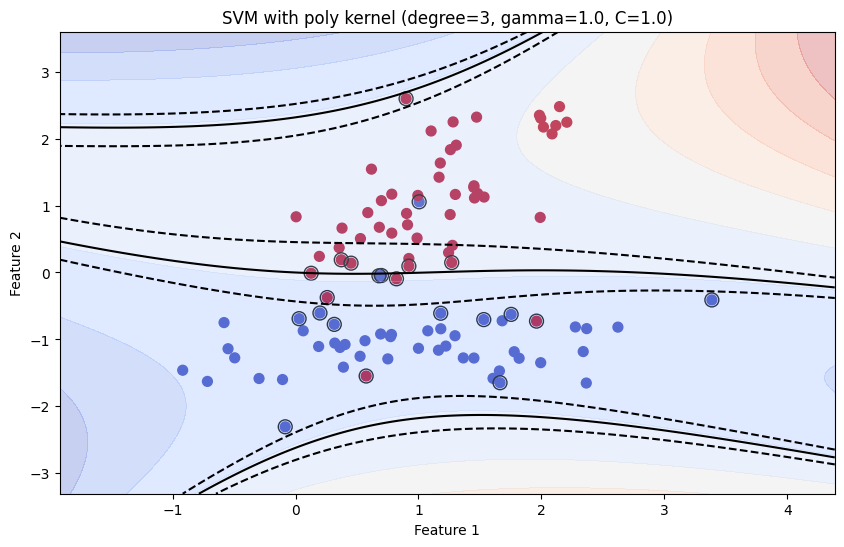

In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def plot_decision_boundary(X, y, support_vectors, support_vector_labels, support_vector_alphas, kernel, degree, gamma, C):
    plt.figure(figsize=(10, 6))
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = np.zeros_like(xx)
    
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            x = np.array([xx[i, j], yy[i, j]])
            K = np.zeros(len(support_vectors))
            if kernel == 'linear':
                K = np.dot(support_vectors, x)
            elif kernel == 'poly':
                K = (np.dot(support_vectors, x) + 1) ** degree
            elif kernel == 'rbf':
                for k in range(len(support_vectors)):
                    diff = support_vectors[k] - x
                    K[k] = np.exp(-gamma * np.dot(diff, diff))
            Z[i, j] = np.sum(support_vector_alphas * support_vector_labels * K)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=np.linspace(Z.min(), Z.max(), 10))
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
    
    plt.title(f'SVM with {kernel} kernel (degree={degree}, gamma={gamma}, C={C})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, flip_y=0.1)
y = 2 * y - 1

C = 1.0
kernel = 'poly'
degree = 3
gamma = 1.0
support_vectors, support_vector_labels, support_vector_alphas = svm_train(X, y, C, kernel, degree, gamma)

plot_decision_boundary(X, y, support_vectors, support_vector_labels, support_vector_alphas, kernel, degree, gamma, C)


## 3 пункт

     pcost       dcost       gap    pres   dres
 0: -1.5896e+01 -2.2373e+01  9e+02  3e+01  6e-15
 1: -2.6319e+00 -2.0927e+01  5e+01  1e+00  9e-15
 2: -1.7342e+00 -9.7202e+00  1e+01  1e-01  1e-15
 3: -1.7821e+00 -3.0049e+00  1e+00  1e-02  3e-15
 4: -2.0607e+00 -2.4518e+00  4e-01  3e-03  1e-15
 5: -2.1391e+00 -2.3066e+00  2e-01  1e-03  7e-16
 6: -2.1712e+00 -2.2597e+00  9e-02  4e-04  6e-16
 7: -2.1927e+00 -2.2219e+00  3e-02  6e-05  7e-16
 8: -2.2026e+00 -2.2087e+00  6e-03  1e-05  1e-15
 9: -2.2052e+00 -2.2055e+00  3e-04  1e-07  7e-16
10: -2.2053e+00 -2.2053e+00  3e-06  1e-09  8e-16
11: -2.2053e+00 -2.2053e+00  3e-08  1e-11  8e-16
Optimal solution found.


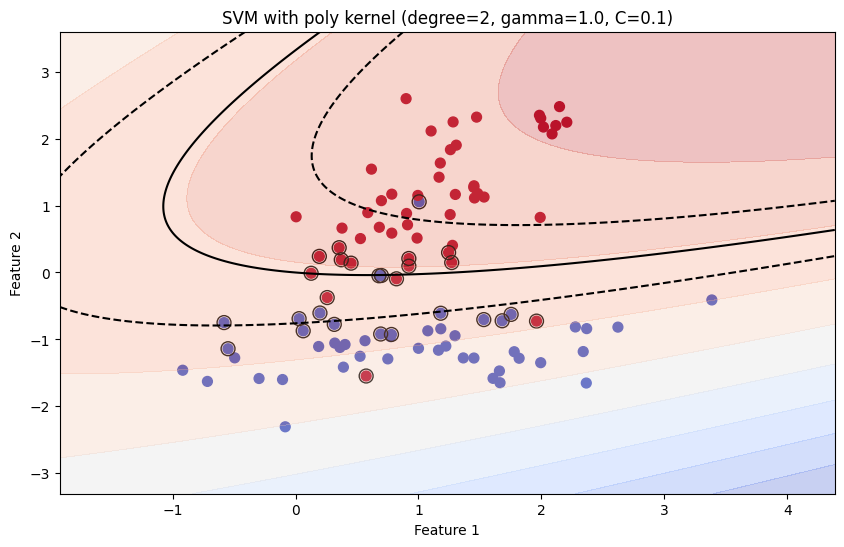

     pcost       dcost       gap    pres   dres
 0: -1.3345e+01 -2.1925e+01  9e+02  3e+01  5e-14
 1: -2.1509e+00 -2.0417e+01  4e+01  8e-01  3e-14
 2: -1.7065e+00 -9.8367e+00  1e+01  2e-01  9e-15
 3: -1.6460e+00 -3.4463e+00  2e+00  3e-02  3e-15
 4: -1.8527e+00 -2.2888e+00  5e-01  5e-03  3e-15
 5: -1.9389e+00 -2.0866e+00  2e-01  1e-03  2e-15
 6: -1.9741e+00 -2.0196e+00  5e-02  3e-04  2e-15
 7: -1.9896e+00 -1.9923e+00  3e-03  5e-06  2e-15
 8: -1.9907e+00 -1.9907e+00  6e-05  9e-08  3e-15
 9: -1.9907e+00 -1.9907e+00  1e-06  1e-09  3e-15
Optimal solution found.


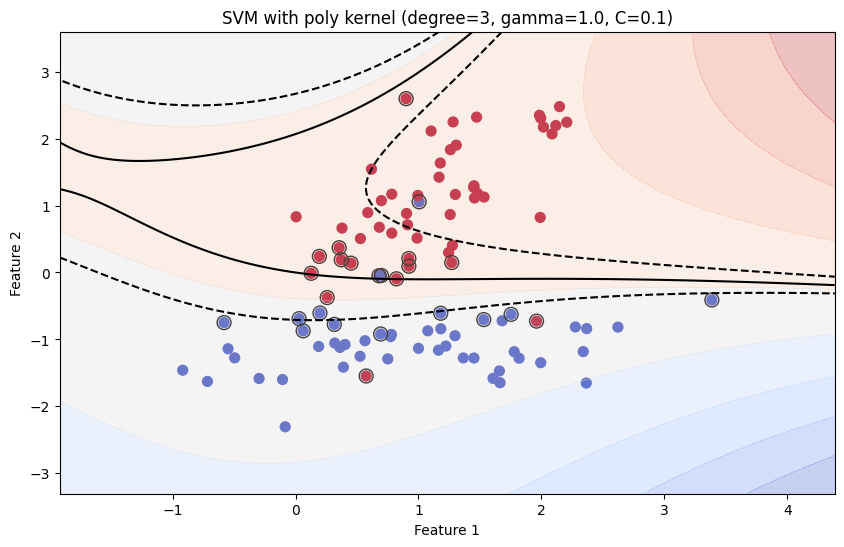

     pcost       dcost       gap    pres   dres
 0: -1.2236e+01 -2.2104e+01  9e+02  3e+01  2e-13
 1: -1.9243e+00 -2.0566e+01  4e+01  8e-01  2e-13
 2: -1.4719e+00 -7.3364e+00  7e+00  9e-02  3e-14
 3: -1.5342e+00 -2.5622e+00  1e+00  1e-02  2e-14
 4: -1.6582e+00 -2.0827e+00  5e-01  4e-03  1e-14
 5: -1.7158e+00 -1.8473e+00  1e-01  1e-03  1e-14
 6: -1.7360e+00 -1.7921e+00  6e-02  2e-04  1e-14
 7: -1.7495e+00 -1.7630e+00  1e-02  3e-05  1e-14
 8: -1.7536e+00 -1.7554e+00  2e-03  2e-06  1e-14
 9: -1.7542e+00 -1.7543e+00  7e-05  2e-08  1e-14
10: -1.7543e+00 -1.7543e+00  2e-06  4e-10  2e-14
11: -1.7543e+00 -1.7543e+00  4e-08  5e-12  1e-14
Optimal solution found.


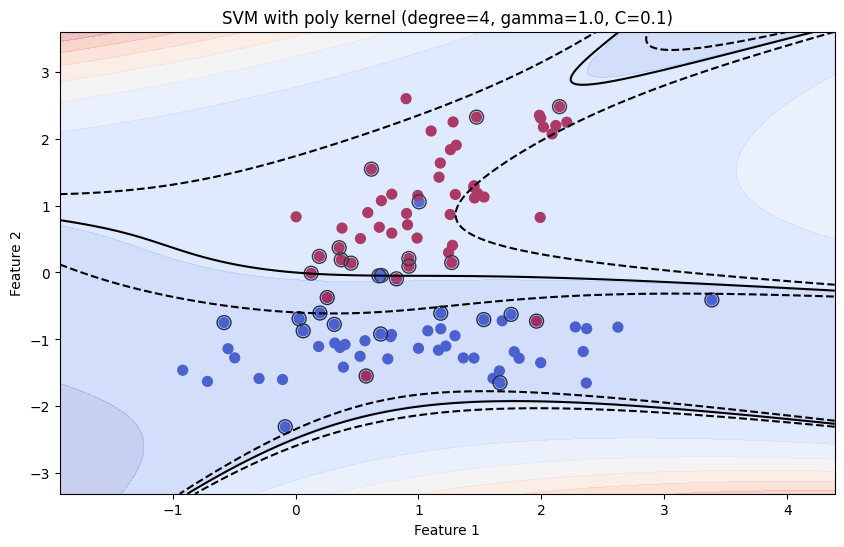

     pcost       dcost       gap    pres   dres
 0: -2.8648e+01 -2.4060e+02  1e+03  3e+00  1e-14
 1: -1.7368e+01 -1.5094e+02  2e+02  4e-01  9e-15
 2: -1.3048e+01 -3.6996e+01  3e+01  2e-02  6e-15
 3: -1.4642e+01 -2.1981e+01  8e+00  7e-03  5e-15
 4: -1.5737e+01 -1.9433e+01  4e+00  3e-03  4e-15
 5: -1.6506e+01 -1.7819e+01  1e+00  7e-04  4e-15
 6: -1.6784e+01 -1.7207e+01  4e-01  2e-04  4e-15
 7: -1.6912e+01 -1.6976e+01  6e-02  2e-16  5e-15
 8: -1.6931e+01 -1.6952e+01  2e-02  2e-16  4e-15
 9: -1.6939e+01 -1.6942e+01  3e-03  2e-16  6e-15
10: -1.6940e+01 -1.6941e+01  3e-05  6e-16  5e-15
11: -1.6941e+01 -1.6941e+01  3e-07  4e-16  5e-15
Optimal solution found.


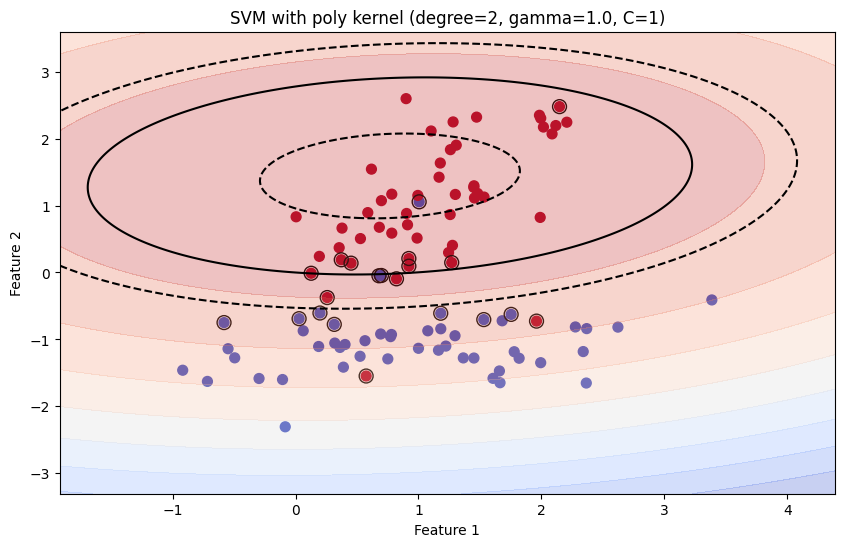

     pcost       dcost       gap    pres   dres
 0: -2.3897e+01 -2.3134e+02  1e+03  3e+00  7e-14
 1: -1.4418e+01 -1.3346e+02  2e+02  2e-01  5e-14
 2: -1.2775e+01 -3.5511e+01  3e+01  2e-02  3e-14
 3: -1.4017e+01 -2.0659e+01  7e+00  6e-03  2e-14
 4: -1.4861e+01 -1.7393e+01  3e+00  1e-03  2e-14
 5: -1.5440e+01 -1.6184e+01  8e-01  2e-04  2e-14
 6: -1.5535e+01 -1.5949e+01  4e-01  7e-05  3e-14
 7: -1.5670e+01 -1.5717e+01  5e-02  6e-06  3e-14
 8: -1.5688e+01 -1.5689e+01  1e-03  1e-07  3e-14
 9: -1.5689e+01 -1.5689e+01  1e-05  1e-09  2e-14
Optimal solution found.


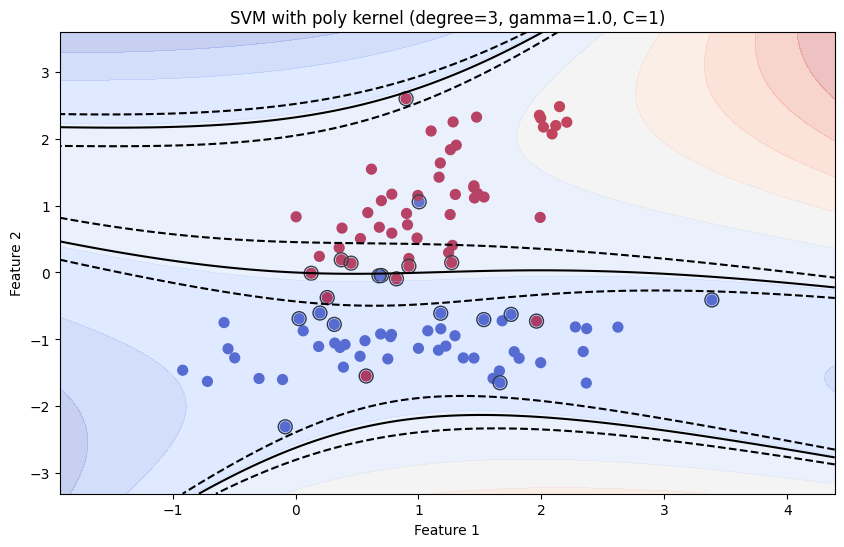

     pcost       dcost       gap    pres   dres
 0: -2.1959e+01 -2.3538e+02  1e+03  3e+00  3e-13
 1: -1.3114e+01 -1.3640e+02  2e+02  2e-01  3e-13
 2: -1.1154e+01 -5.1073e+01  5e+01  4e-02  1e-13
 3: -1.1787e+01 -2.1874e+01  1e+01  7e-03  1e-13
 4: -1.2549e+01 -1.7657e+01  5e+00  3e-03  1e-13
 5: -1.3021e+01 -1.4392e+01  1e+00  4e-04  1e-13
 6: -1.3203e+01 -1.3979e+01  8e-01  1e-04  1e-13
 7: -1.3383e+01 -1.3539e+01  2e-01  2e-05  2e-13
 8: -1.3431e+01 -1.3454e+01  2e-02  1e-06  1e-13
 9: -1.3440e+01 -1.3440e+01  5e-04  3e-08  1e-13
10: -1.3440e+01 -1.3440e+01  1e-05  4e-10  1e-13
Optimal solution found.


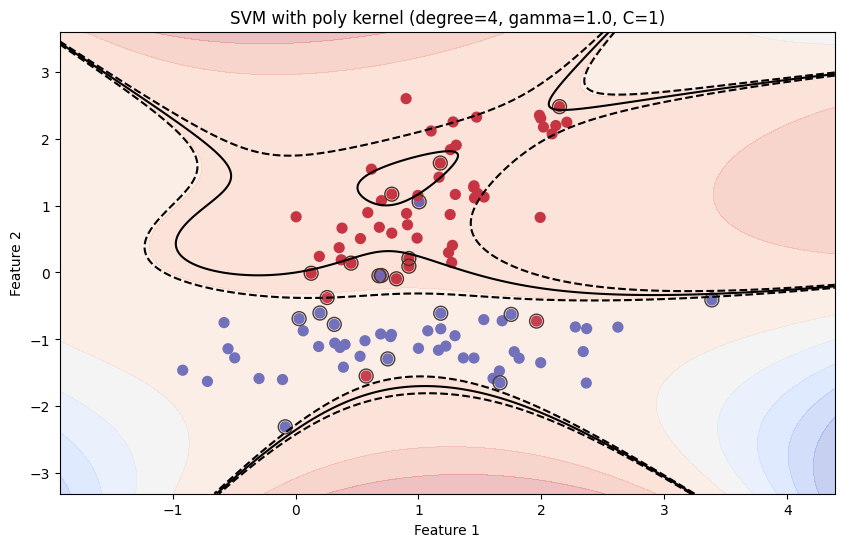

     pcost       dcost       gap    pres   dres
 0: -1.4360e+02 -8.0400e+03  2e+04  9e-01  8e-14
 1: -8.7079e+01 -2.5625e+03  3e+03  5e-02  6e-14
 2: -1.0855e+02 -5.1234e+02  4e+02  6e-03  4e-14
 3: -1.2542e+02 -2.3606e+02  1e+02  1e-03  4e-14
 4: -1.3835e+02 -2.1820e+02  8e+01  6e-04  4e-14
 5: -1.5088e+02 -1.8247e+02  3e+01  2e-04  4e-14
 6: -1.5376e+02 -1.7137e+02  2e+01  5e-05  6e-14
 7: -1.5811e+02 -1.6413e+02  6e+00  1e-05  5e-14
 8: -1.5993e+02 -1.6108e+02  1e+00  2e-06  5e-14
 9: -1.5999e+02 -1.6102e+02  1e+00  1e-06  5e-14
10: -1.6038e+02 -1.6049e+02  1e-01  7e-08  4e-14
11: -1.6043e+02 -1.6043e+02  2e-03  9e-10  4e-14
12: -1.6043e+02 -1.6043e+02  2e-05  9e-12  6e-14
Optimal solution found.


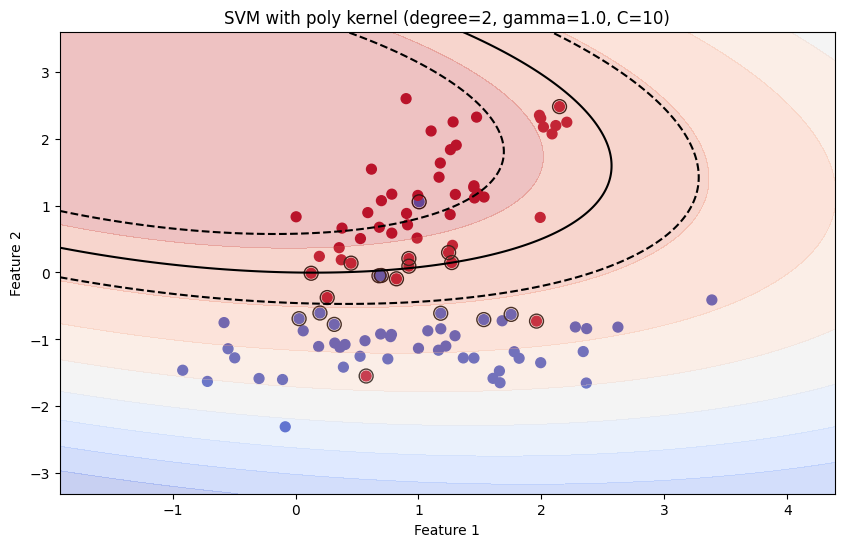

     pcost       dcost       gap    pres   dres
 0: -1.1126e+02 -3.8509e+03  7e+03  3e-01  4e-13
 1: -8.6503e+01 -7.6611e+02  8e+02  2e-02  2e-13
 2: -1.0509e+02 -2.9049e+02  2e+02  4e-03  2e-13
 3: -1.1681e+02 -2.0331e+02  9e+01  2e-03  2e-13
 4: -1.2663e+02 -1.7996e+02  5e+01  8e-04  2e-13
 5: -1.3378e+02 -1.6142e+02  3e+01  3e-04  2e-13
 6: -1.3691e+02 -1.5092e+02  1e+01  5e-05  2e-13
 7: -1.3978e+02 -1.4504e+02  5e+00  1e-05  2e-13
 8: -1.4090e+02 -1.4319e+02  2e+00  4e-06  2e-13
 9: -1.4130e+02 -1.4234e+02  1e+00  4e-07  2e-13
10: -1.4173e+02 -1.4179e+02  6e-02  1e-08  2e-13
11: -1.4175e+02 -1.4176e+02  9e-04  5e-11  2e-13
12: -1.4176e+02 -1.4176e+02  9e-06  5e-13  2e-13
Optimal solution found.


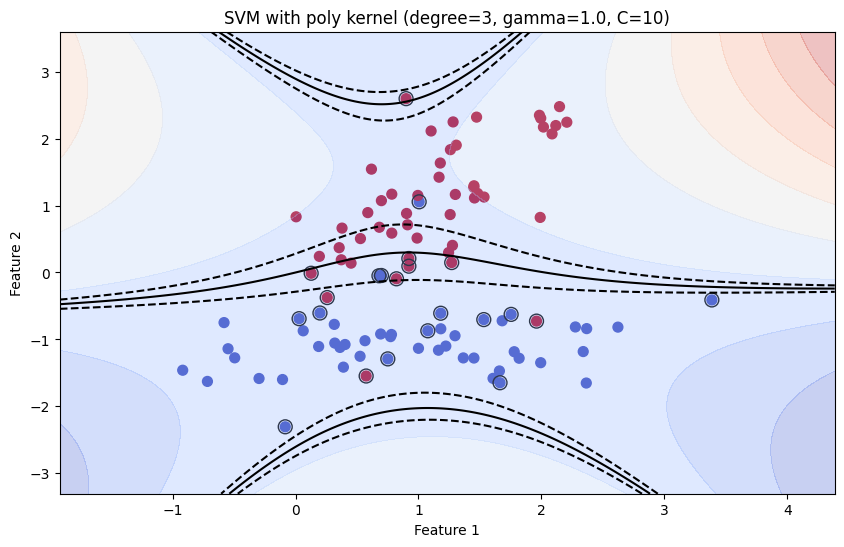

     pcost       dcost       gap    pres   dres
 0: -1.0493e+02 -3.9300e+03  8e+03  4e-01  2e-12
 1: -8.6654e+01 -1.4978e+03  2e+03  9e-02  2e-12
 2: -6.4811e+01 -5.9344e+02  7e+02  2e-02  1e-12
 3: -7.3773e+01 -3.3486e+02  3e+02  9e-03  1e-12
 4: -8.8366e+01 -1.8573e+02  1e+02  3e-16  1e-12
 5: -9.8370e+01 -1.4199e+02  4e+01  2e-15  1e-12
 6: -1.0615e+02 -1.2810e+02  2e+01  5e-15  2e-12
 7: -1.0981e+02 -1.1747e+02  8e+00  6e-16  1e-12
 8: -1.1142e+02 -1.1376e+02  2e+00  1e-14  1e-12
 9: -1.1214e+02 -1.1230e+02  2e-01  1e-14  2e-12
10: -1.1219e+02 -1.1220e+02  1e-02  4e-15  2e-12
11: -1.1220e+02 -1.1220e+02  2e-03  9e-15  8e-13
12: -1.1220e+02 -1.1220e+02  2e-05  6e-15  1e-12
Optimal solution found.


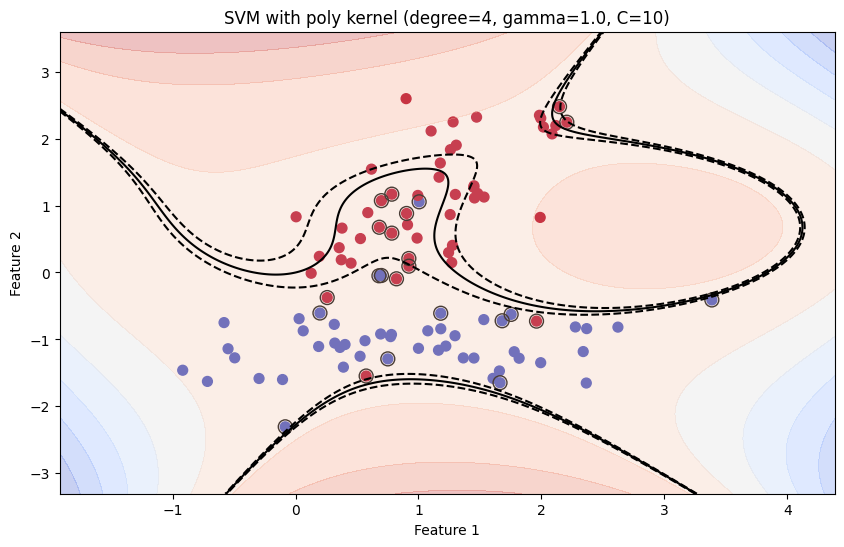

In [35]:
C_values = [0.1, 1, 10]
degrees = [2, 3, 4]

for C in C_values:
    for degree in degrees:
        support_vectors, support_vector_labels, support_vector_alphas = svm_train(X, y, C, kernel='poly', degree=degree, gamma=1.0)
        plot_decision_boundary(X, y, support_vectors, support_vector_labels, support_vector_alphas, 'poly', degree, 1.0, C)


## 4 пункт

     pcost       dcost       gap    pres   dres
 0: -1.6335e+01 -2.4212e+01  8e+02  3e+01  7e-16
 1: -4.3955e+00 -2.3067e+01  2e+01  1e-01  8e-16
 2: -4.5918e+00 -6.9685e+00  2e+00  1e-02  3e-16
 3: -5.0178e+00 -5.6388e+00  6e-01  2e-03  3e-16
 4: -5.2085e+00 -5.3302e+00  1e-01  3e-04  3e-16
 5: -5.2508e+00 -5.2794e+00  3e-02  4e-05  3e-16
 6: -5.2623e+00 -5.2659e+00  4e-03  4e-06  4e-16
 7: -5.2638e+00 -5.2640e+00  2e-04  2e-07  3e-16
 8: -5.2639e+00 -5.2639e+00  5e-06  4e-09  3e-16
Optimal solution found.


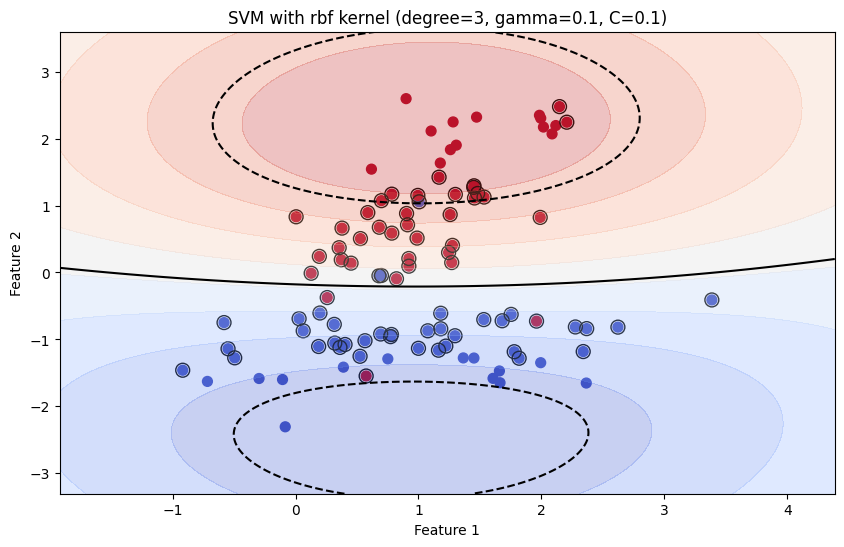

     pcost       dcost       gap    pres   dres
 0: -1.3103e+01 -2.3602e+01  8e+02  3e+01  4e-16
 1: -4.2696e+00 -2.2223e+01  3e+01  3e-01  5e-16
 2: -4.2283e+00 -6.2985e+00  2e+00  7e-03  3e-16
 3: -4.5340e+00 -4.8371e+00  3e-01  8e-04  3e-16
 4: -4.6426e+00 -4.7166e+00  7e-02  1e-04  2e-16
 5: -4.6728e+00 -4.6904e+00  2e-02  2e-05  2e-16
 6: -4.6792e+00 -4.6830e+00  4e-03  3e-06  3e-16
 7: -4.6808e+00 -4.6811e+00  3e-04  2e-07  2e-16
 8: -4.6809e+00 -4.6809e+00  8e-06  4e-09  3e-16
 9: -4.6809e+00 -4.6809e+00  2e-07  6e-11  3e-16
Optimal solution found.


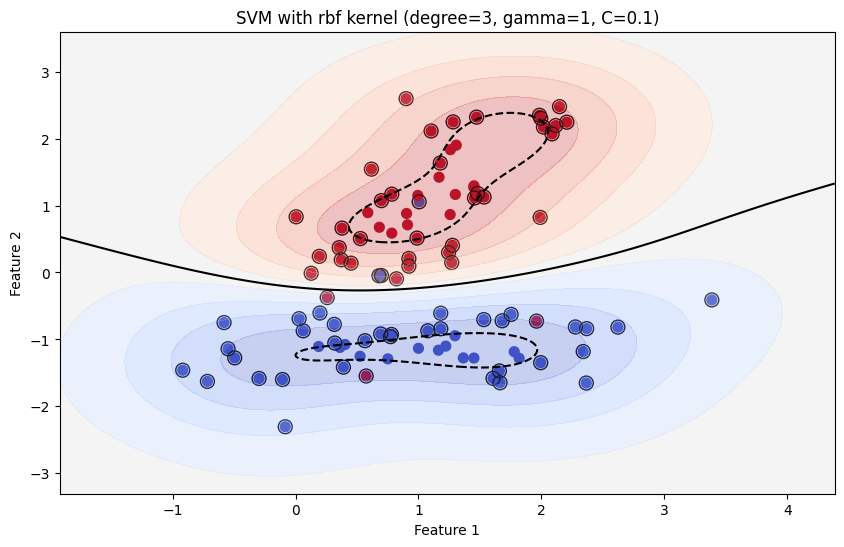

     pcost       dcost       gap    pres   dres
 0: -1.7289e+01 -2.4803e+01  6e+02  2e+01  4e-16
 1: -8.7973e+00 -2.1364e+01  3e+01  6e-01  4e-16
 2: -7.5719e+00 -1.0444e+01  3e+00  2e-16  6e-16
 3: -8.1467e+00 -8.2807e+00  1e-01  2e-16  3e-16
 4: -8.2244e+00 -8.2259e+00  1e-03  2e-16  3e-16
 5: -8.2253e+00 -8.2253e+00  1e-05  2e-16  3e-16
 6: -8.2253e+00 -8.2253e+00  1e-07  2e-16  3e-16
Optimal solution found.


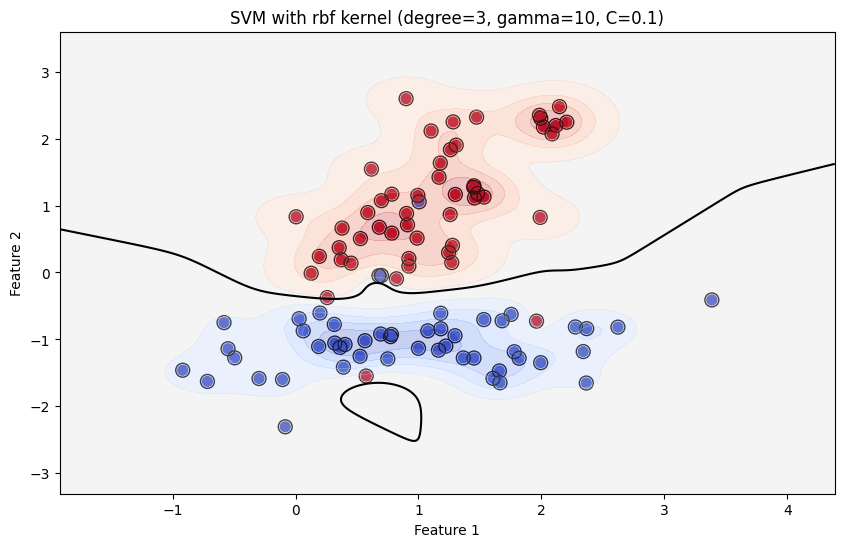

     pcost       dcost       gap    pres   dres
 0: -2.6162e+01 -2.4121e+02  1e+03  3e+00  1e-15
 1: -1.4087e+01 -1.4989e+02  2e+02  6e-02  8e-16
 2: -1.7990e+01 -3.6084e+01  2e+01  7e-03  7e-16
 3: -2.2230e+01 -2.7645e+01  5e+00  1e-03  6e-16
 4: -2.3409e+01 -2.5640e+01  2e+00  5e-04  6e-16
 5: -2.4039e+01 -2.4675e+01  6e-01  6e-05  9e-16
 6: -2.4187e+01 -2.4414e+01  2e-01  8e-06  8e-16
 7: -2.4279e+01 -2.4300e+01  2e-02  2e-07  8e-16
 8: -2.4289e+01 -2.4289e+01  3e-04  3e-09  7e-16
 9: -2.4289e+01 -2.4289e+01  3e-06  3e-11  7e-16
Optimal solution found.


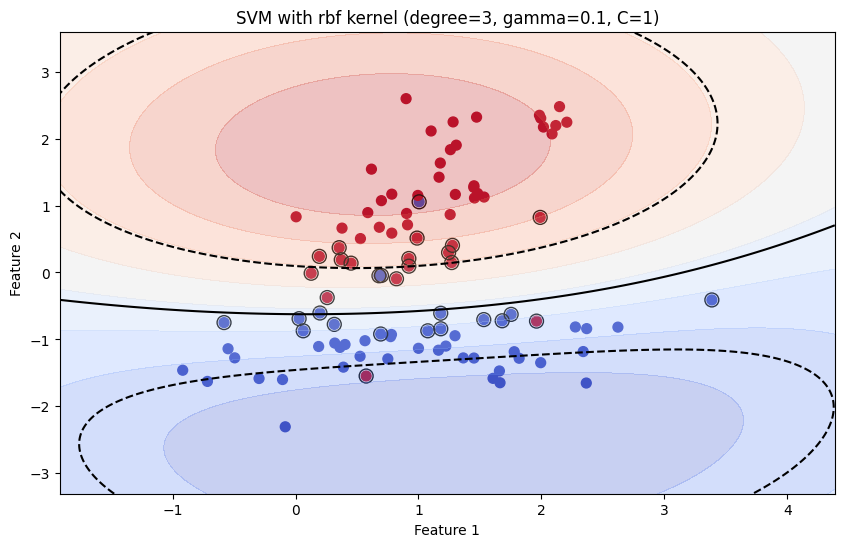

     pcost       dcost       gap    pres   dres
 0: -1.9704e+01 -2.2429e+02  1e+03  3e+00  5e-16
 1: -1.0672e+01 -1.3490e+02  1e+02  7e-02  7e-16
 2: -1.4188e+01 -3.0247e+01  2e+01  7e-03  1e-15
 3: -1.5984e+01 -2.1429e+01  5e+00  2e-03  4e-16
 4: -1.6769e+01 -1.8935e+01  2e+00  5e-04  3e-16
 5: -1.7120e+01 -1.7711e+01  6e-01  9e-05  4e-16
 6: -1.7241e+01 -1.7448e+01  2e-01  2e-05  3e-16
 7: -1.7293e+01 -1.7343e+01  5e-02  8e-16  4e-16
 8: -1.7310e+01 -1.7313e+01  3e-03  6e-16  4e-16
 9: -1.7311e+01 -1.7311e+01  4e-05  2e-16  4e-16
10: -1.7311e+01 -1.7311e+01  4e-07  2e-15  4e-16
Optimal solution found.


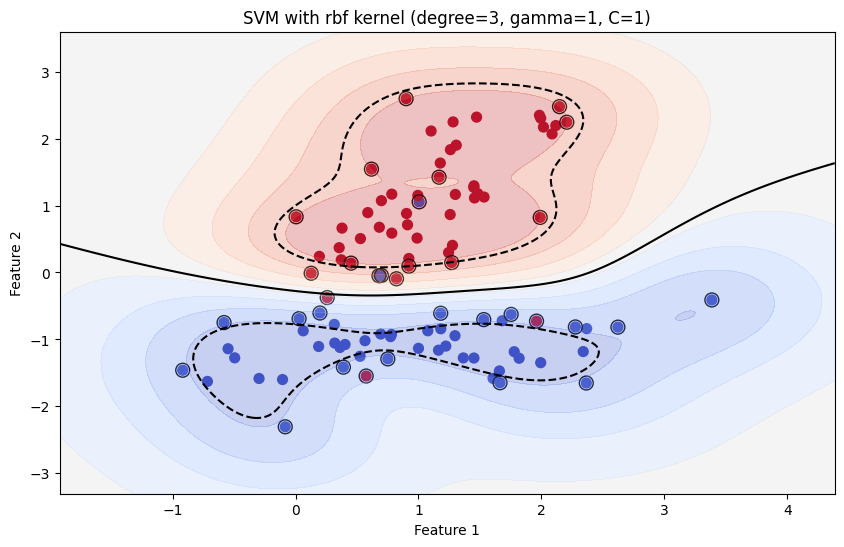

     pcost       dcost       gap    pres   dres
 0: -2.2274e+01 -1.9572e+02  7e+02  2e+00  4e-16
 1: -1.9443e+01 -1.1258e+02  9e+01  3e-16  4e-16
 2: -2.2610e+01 -3.3929e+01  1e+01  5e-16  3e-16
 3: -2.4211e+01 -2.6564e+01  2e+00  1e-16  2e-16
 4: -2.4623e+01 -2.5151e+01  5e-01  7e-16  2e-16
 5: -2.4750e+01 -2.4832e+01  8e-02  2e-16  2e-16
 6: -2.4773e+01 -2.4777e+01  4e-03  2e-16  2e-16
 7: -2.4774e+01 -2.4774e+01  1e-04  3e-16  2e-16
 8: -2.4774e+01 -2.4774e+01  3e-06  9e-16  3e-16
Optimal solution found.


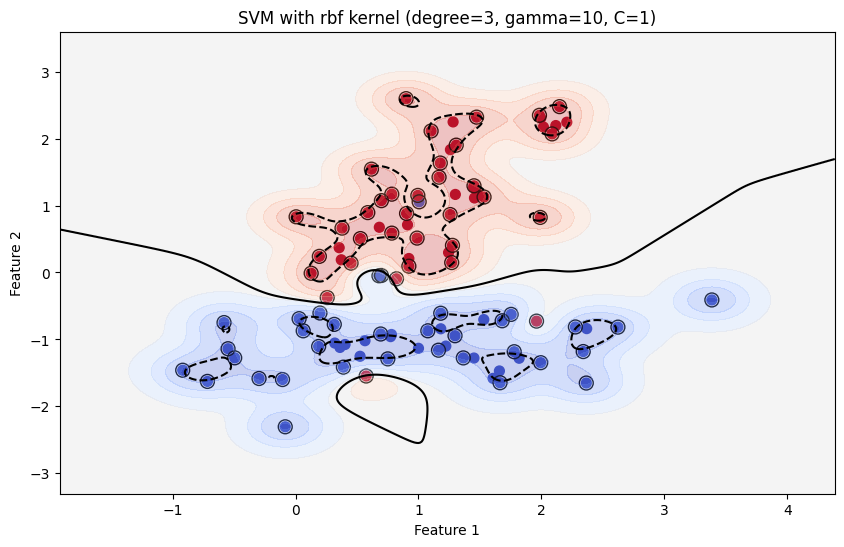

     pcost       dcost       gap    pres   dres
 0:  5.0695e+01 -4.0720e+03  7e+03  3e-01  6e-15
 1: -1.0922e+01 -6.2467e+02  7e+02  9e-03  4e-15
 2: -1.1170e+02 -2.4890e+02  1e+02  1e-03  4e-15
 3: -1.2723e+02 -2.2982e+02  1e+02  1e-03  4e-15
 4: -1.3814e+02 -2.1267e+02  8e+01  6e-04  4e-15
 5: -1.4997e+02 -1.9207e+02  4e+01  2e-04  6e-15
 6: -1.5491e+02 -1.8090e+02  3e+01  8e-05  5e-15
 7: -1.6033e+02 -1.7180e+02  1e+01  2e-05  4e-15
 8: -1.6376e+02 -1.6696e+02  3e+00  2e-14  5e-15
 9: -1.6497e+02 -1.6524e+02  3e-01  7e-15  6e-15
10: -1.6509e+02 -1.6509e+02  4e-03  5e-15  6e-15
11: -1.6509e+02 -1.6509e+02  4e-05  5e-15  6e-15
Optimal solution found.


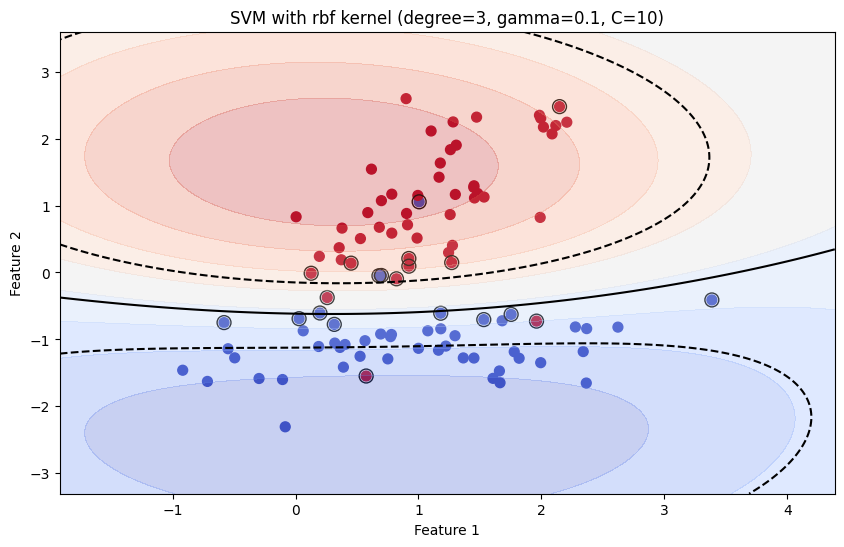

     pcost       dcost       gap    pres   dres
 0:  1.1825e+02 -3.1096e+03  5e+03  2e-01  3e-15
 1: -8.6670e+00 -5.0920e+02  5e+02  1e-02  2e-15
 2: -8.1536e+01 -2.1347e+02  1e+02  2e-03  2e-15
 3: -1.0298e+02 -1.4930e+02  5e+01  3e-04  2e-15
 4: -1.1110e+02 -1.2299e+02  1e+01  4e-05  2e-15
 5: -1.1388e+02 -1.1707e+02  3e+00  4e-06  2e-15
 6: -1.1475e+02 -1.1520e+02  5e-01  2e-07  2e-15
 7: -1.1489e+02 -1.1499e+02  1e-01  2e-08  2e-15
 8: -1.1492e+02 -1.1493e+02  1e-02  3e-09  2e-15
 9: -1.1493e+02 -1.1493e+02  3e-03  2e-10  2e-15
10: -1.1493e+02 -1.1493e+02  5e-05  3e-12  2e-15
Optimal solution found.


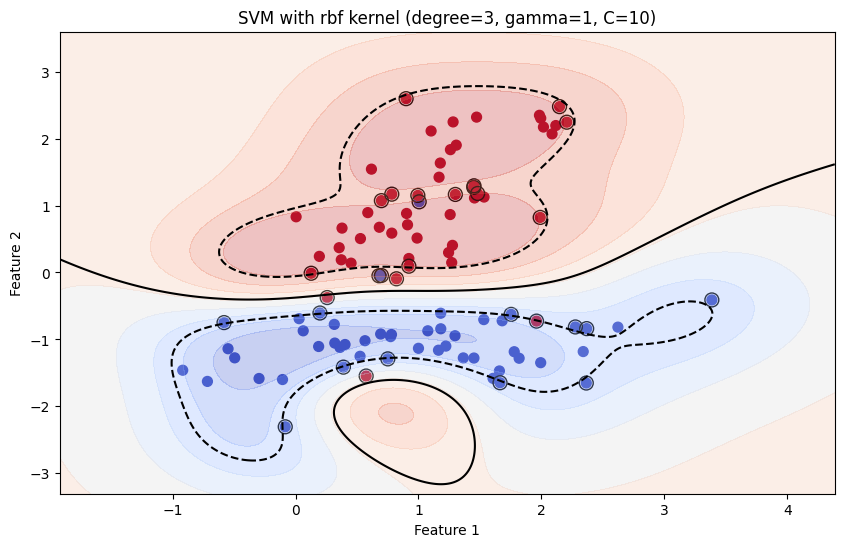

     pcost       dcost       gap    pres   dres
 0:  3.8134e+02 -3.1234e+03  4e+03  4e-15  3e-15
 1:  4.6412e+01 -3.2059e+02  4e+02  4e-15  3e-15
 2: -3.3703e+01 -1.1165e+02  8e+01  2e-15  9e-16
 3: -4.7298e+01 -5.8540e+01  1e+01  6e-16  6e-16
 4: -4.9247e+01 -5.0971e+01  2e+00  3e-15  5e-16
 5: -4.9661e+01 -4.9995e+01  3e-01  2e-15  6e-16
 6: -4.9770e+01 -4.9809e+01  4e-02  2e-15  6e-16
 7: -4.9782e+01 -4.9784e+01  1e-03  1e-15  7e-16
 8: -4.9783e+01 -4.9783e+01  3e-05  1e-15  7e-16
Optimal solution found.


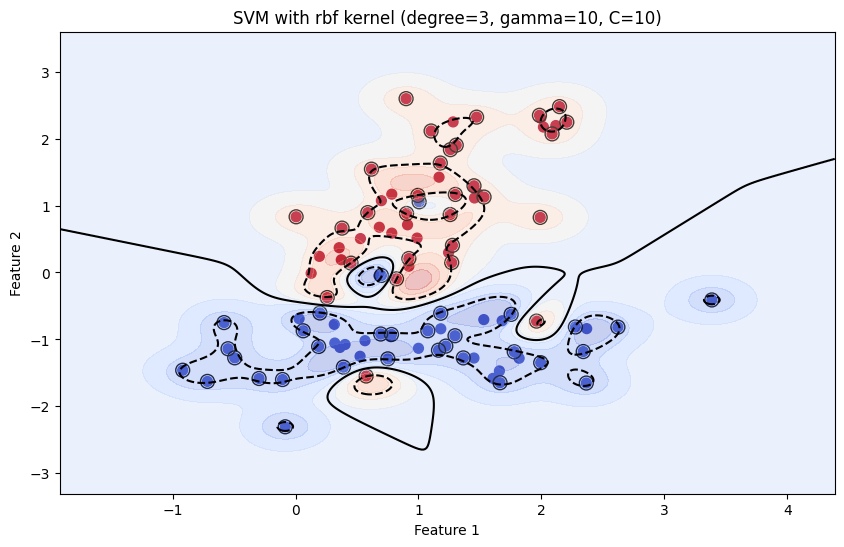

In [36]:
gamma_values = [0.1, 1, 10]
C_values = [0.1, 1, 10]

for C in C_values:
    for gamma in gamma_values:
        support_vectors, support_vector_labels, support_vector_alphas = svm_train(X, y, C, kernel='rbf', degree=3, gamma=gamma)
        plot_decision_boundary(X, y, support_vectors, support_vector_labels, support_vector_alphas, 'rbf', 3, gamma, C)
